In [1]:
%pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\airwo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm
from typing import List, Dict, Set, Tuple, Optional, Callable
from collections import Counter, defaultdict
from functools import cache
import datetime
from math import sqrt, pow

warnings.filterwarnings('ignore')

In [3]:
df_test = pd.read_csv('data/fraudTest.csv')
df_train = pd.read_csv('data/fraudTrain.csv')

In [4]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [5]:
df_test.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [6]:
df_test.is_fraud.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [7]:
# Utils
def calculate_age(date: datetime) -> datetime:
  birthdate = datetime.datetime.strptime(date, "%Y-%m-%d")
  today = datetime.datetime.today()
  age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
  return age

euc: Callable[[float, float, float, float], float] = lambda x2, x1, y2, y1: sqrt(pow((x2 - x1), 2) + pow((y2 - y1), 2))


In [8]:
# Data Cleaning

df_test.drop(['Unnamed: 0'], axis=1, inplace=True)
df_test.drop_duplicates(inplace=True)
df_test.dropna(inplace=True)

# Feature Engineering
df_test['age'] = df_test['dob'].apply(calculate_age)
df_test.drop(['dob'], axis=1, inplace=True)
df_test['name'] = df_test['first'] + ' ' + df_test['last']
df_test.drop(['first', 'last'], axis=1, inplace=True)
df_test.head(20)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,name
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,...,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,56,Jeff Elliott
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,...,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,34,Joanne Williams
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,...,-73.5365,34496,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,54,Ashley Lopez
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,...,-80.8191,54767,Set designer,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,37,Brian Williams
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,...,-85.0170,1126,Furniture designer,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,69,Nathan Massey
5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,F,76752 David Lodge Apt. 064,Breesport,NY,14816,...,-76.7361,520,Psychotherapist,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0,33,Danielle Evans
6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,F,010 Weaver Land,Carlotta,CA,95528,...,-123.9743,1139,"Therapist, occupational",17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0,73,Kayla Sutton
7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,F,350 Stacy Glens,Spencer,SD,57374,...,-97.5936,343,"Development worker, international aid",8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0,52,Paula Estrada
8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,M,4138 David Fall,Morrisdale,PA,16858,...,-78.2357,3688,Advice worker,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0,51,David Everett
9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,F,7921 Robert Port Suite 343,Prairie Hill,TX,76678,...,-96.8094,263,Barrister,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0,68,Kayla Obrien


In [9]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [10]:
numeric_columns = df_test.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_test[numeric_columns].corr()

df_test['trans_timestamp'] = pd.to_datetime(df_test['trans_date_trans_time']).astype(np.int64) // 10**9
numeric_columns = df_test.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_test[numeric_columns].corr()

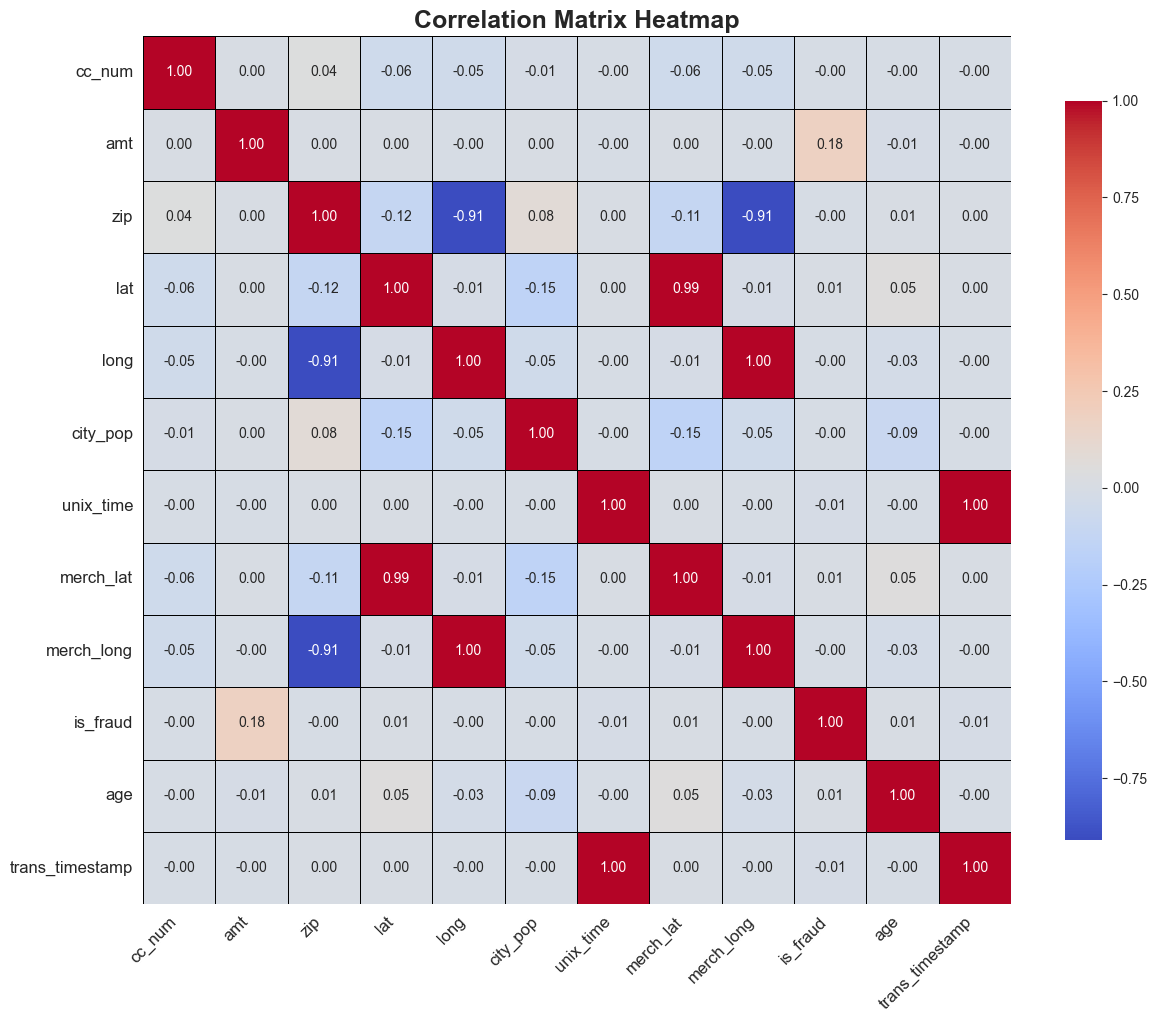

In [11]:
# Set up the matplotlib figure size
plt.figure(figsize=(14, 12))

# Customize the heatmap
sns.heatmap(
    correlation_matrix,            # Your correlation matrix data
    annot=True,                    # Display correlation values
    cmap="coolwarm",               # Color scheme for the heatmap
    fmt=".2f",                     # Format to show 2 decimal points
    linewidths=0.5,                # Line width between cells for clarity
    linecolor="black",             # Line color to separate cells
    square=True,                   # Make each cell square-shaped
    cbar_kws={'shrink': 0.8}       # Shrink the color bar for better fit
)

# Title and label customization
plt.title("Correlation Matrix Heatmap", fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0, fontsize=12)               # Y-axis labels for clarity
plt.show()

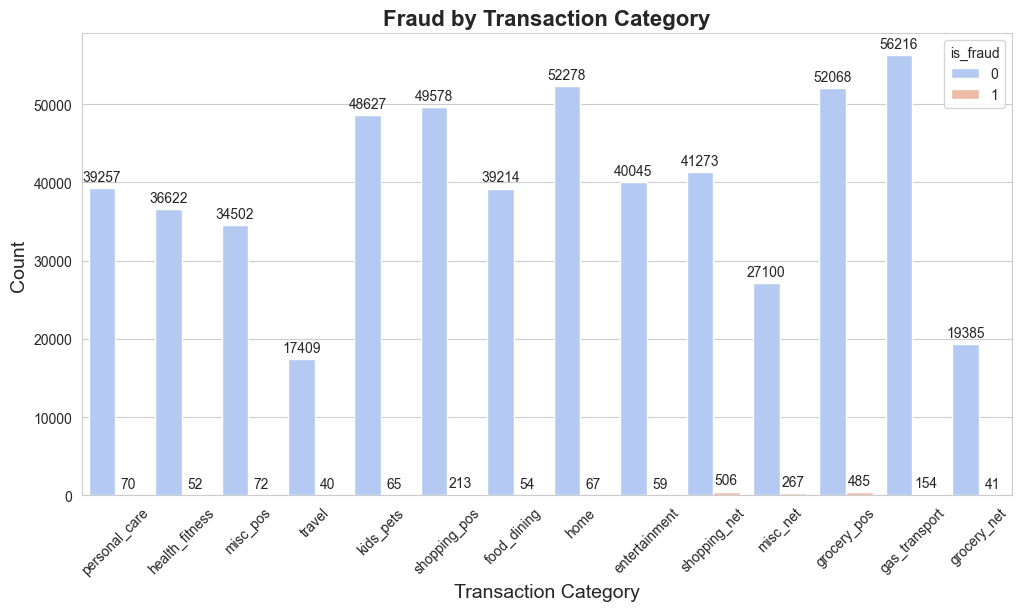

In [12]:
# Set the plot size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the count plot
ax = sns.countplot(x='category', hue='is_fraud', data=df_test, palette='coolwarm')

# Add title and labels
plt.title('Fraud by Transaction Category', fontsize=16, weight='bold')
plt.xlabel('Transaction Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Annotate each bar with the count value
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Display the plot
plt.show()

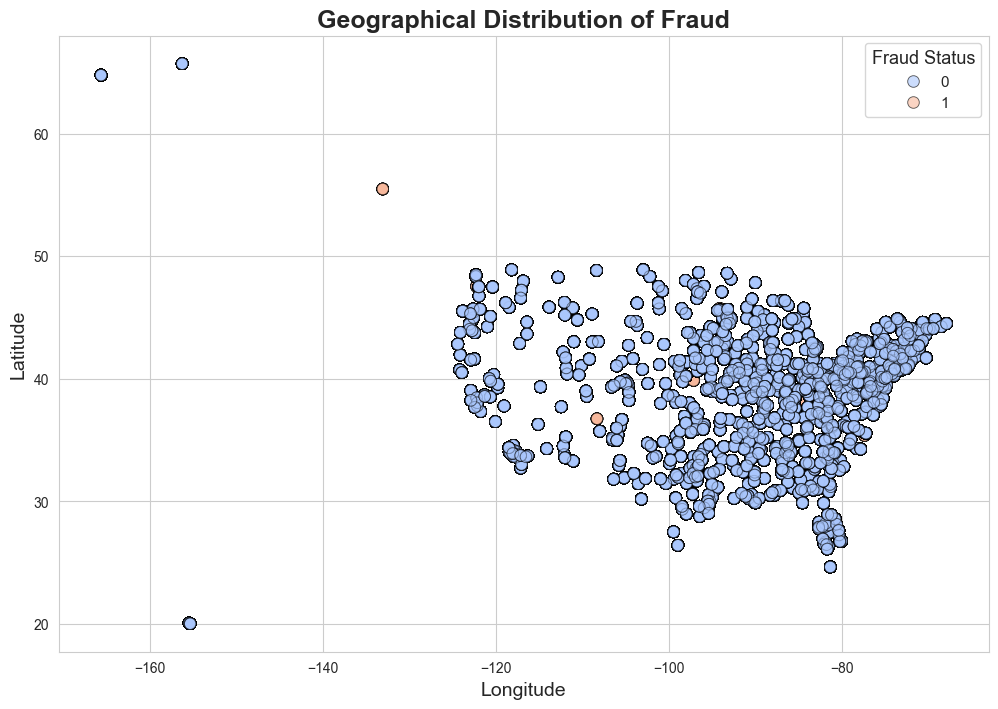

In [13]:
# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create the scatterplot
sns.scatterplot(
    x='long', 
    y='lat', 
    hue='is_fraud',                 # Color by 'is_fraud' feature
    data=df_test, 
    palette="coolwarm",             # Custom color palette for contrast
    edgecolor="k",                  # Black edge color for each point
    alpha=0.6,                      # Adjust alpha for visibility of overlapping points
    s=70                            # Adjust marker size for clarity
)

# Customize the plot with title and labels
plt.title('Geographical Distribution of Fraud', fontsize=18, weight='bold')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Fine-tune legend
plt.legend(title="Fraud Status", title_fontsize='13', fontsize='11', loc='upper right')

# Show the plot
plt.show()

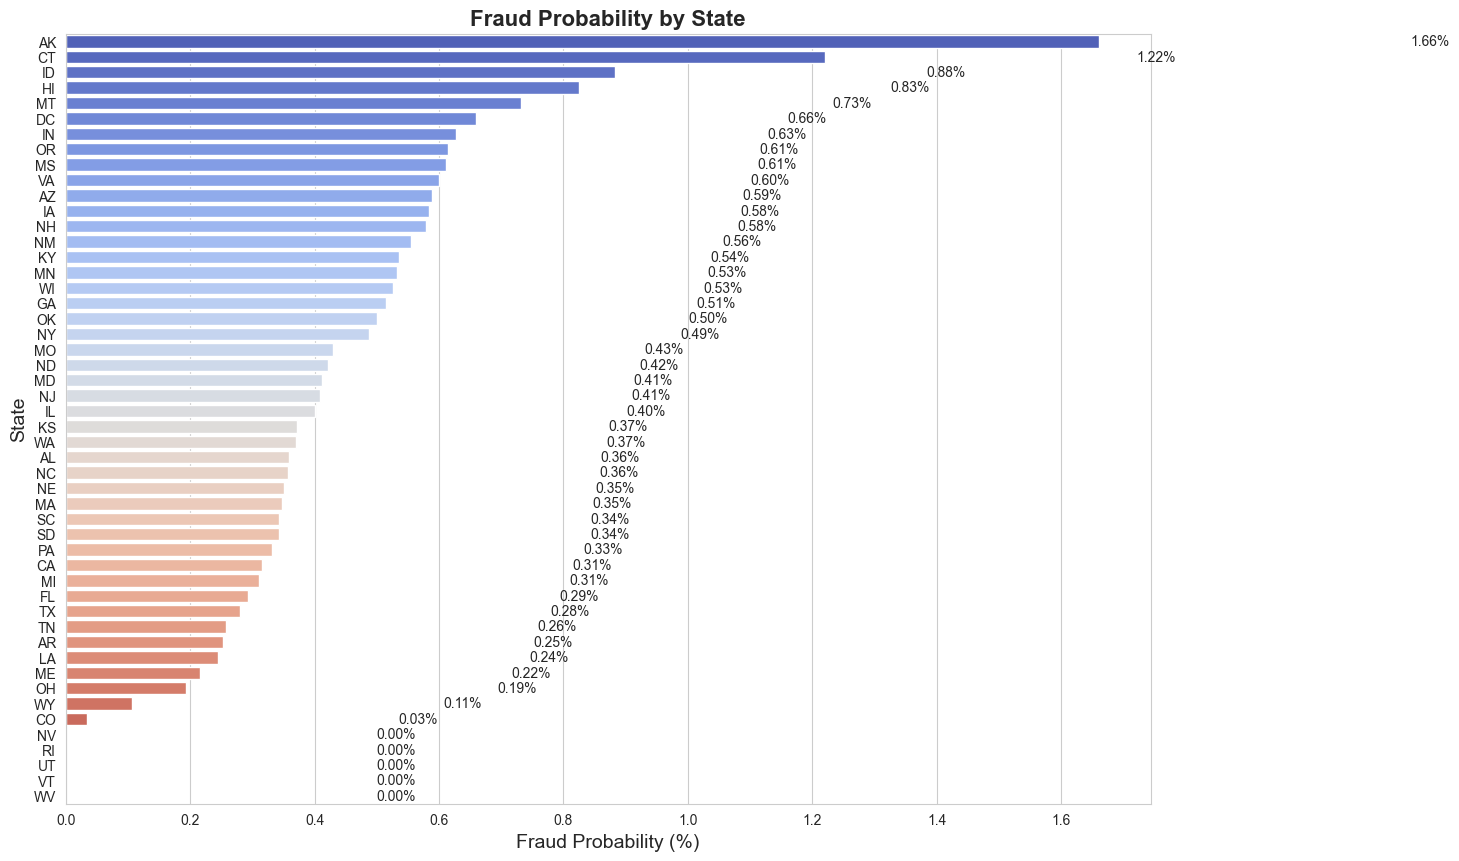

In [14]:
fraud_probability = df_test.groupby('state')['is_fraud'].mean().reset_index()
fraud_probability.columns = ['State', 'Fraud Probability']

# Convert fraud probability to percentage format for better readability
fraud_probability['Fraud Probability'] *= 100  # Convert to percentage

# Sort by fraud probability for a better visual order
fraud_probability = fraud_probability.sort_values(by='Fraud Probability', ascending=False)

# Set the plot size and style
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Create a horizontal bar plot
sns.barplot(
    x='Fraud Probability', 
    y='State', 
    data=fraud_probability,
    palette="coolwarm"
)

# Add title and labels
plt.title('Fraud Probability by State', fontsize=16, weight='bold')
plt.xlabel('Fraud Probability (%)', fontsize=14)
plt.ylabel('State', fontsize=14)

# Display the values on each bar
for index, value in enumerate(fraud_probability['Fraud Probability']):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

# Show the plot
plt.show()

In [15]:
# one-to-many linear regression
target: str = 'is_fraud'

predictors: List[str] = [
  'amt', 'city_pop', 'merch_lat', 'merch_long'
]

lr_x = df_test[predictors]
lr_y = df_test[target]

lr_X_constant = sm.add_constant(lr_x)
lr_model = sm.OLS(lr_y, lr_X_constant).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               is_fraud   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     4782.
Date:                Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:31:05   Log-Likelihood:             7.6605e+05
No. Observations:              555719   AIC:                        -1.532e+06
Df Residuals:                  555714   BIC:                        -1.532e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0036      0.001     -4.356      0.000      -0.005      -0.002
amt          7.21e-05   5.22e-07    138.190      0.000    7.11e-05    7.31e-05
city_pop   -9.812e-10   2.76e-10     -3.557      0.000   -1.52e-09   -4.41e-10
merch_lat   5.649e-05   1.62e-05      3.478      0.001    2.47e-05    8.83e-05
merch_long  -3.94e-06   5.96e-06     -0.661      0.509   -1.56e-05    7.75e-06
==============================================================================
Omnibus:                  1054091.348   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1381386203.993
Skew:                          15.009   Prob(JB):                         0.00
Kurtosis:                     245.399   Cond. No.                     3.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Figure size 1500x3000 with 0 Axes>

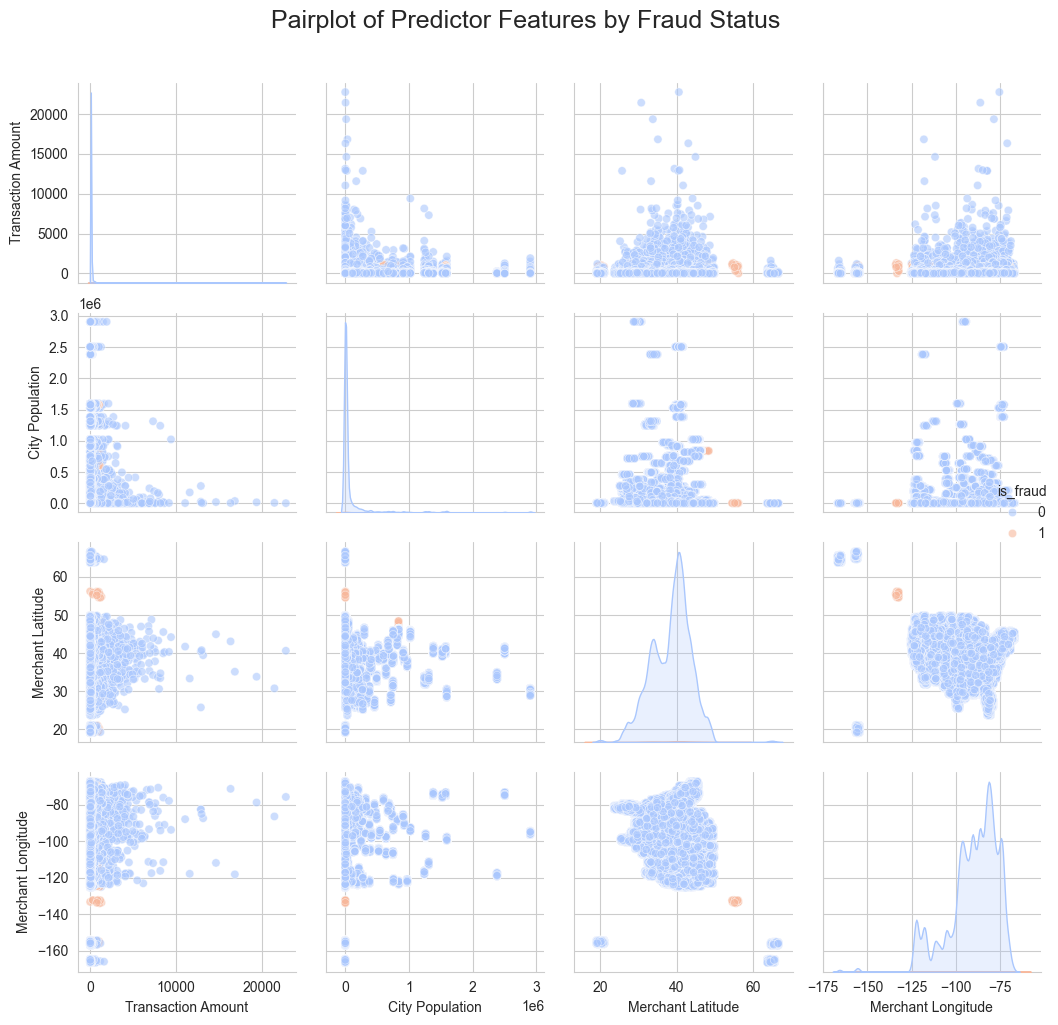

In [16]:
# Original column names in the DataFrame
target: str = 'is_fraud'  # Target variable indicating fraud status
predictors: List[str] = ['amt', 'city_pop', 'merch_lat', 'merch_long']

# Mapping for human-readable names
column_name_mapping = {
    'is_fraud': 'Fraud Status',            # Target variable
    'amt': 'Transaction Amount',            # Amount of the transaction
    'city_pop': 'City Population',          # Population of the city
    'merch_lat': 'Merchant Latitude',       # Latitude of the merchant
    'merch_long': 'Merchant Longitude'      # Longitude of the merchant
}

# Set style and plot size
sns.set_style("whitegrid")
plt.figure(figsize=(15, 30))

# Create a pairplot
pairplot = sns.pairplot(
    df_test[predictors + [target]], 
    hue=target,                     # Color by 'is_fraud' feature
    palette="coolwarm",            # Use a distinct color palette
    diag_kind="kde",               # KDE plot on the diagonal for smooth distributions
    plot_kws={'alpha': 0.6}        # Add transparency for overlapping points
)

# Add a main title using the mapping for readability
pairplot.fig.suptitle('Pairplot of Predictor Features by Fraud Status', fontsize=18, y=1.02)

# Update x and y axis labels with human-readable names
for ax in pairplot.axes.flatten():
    ax.set_xlabel(column_name_mapping.get(ax.get_xlabel(), ax.get_xlabel()))
    ax.set_ylabel(column_name_mapping.get(ax.get_ylabel(), ax.get_ylabel()))

# Adjust layout for better readability
pairplot.fig.tight_layout()
plt.show()


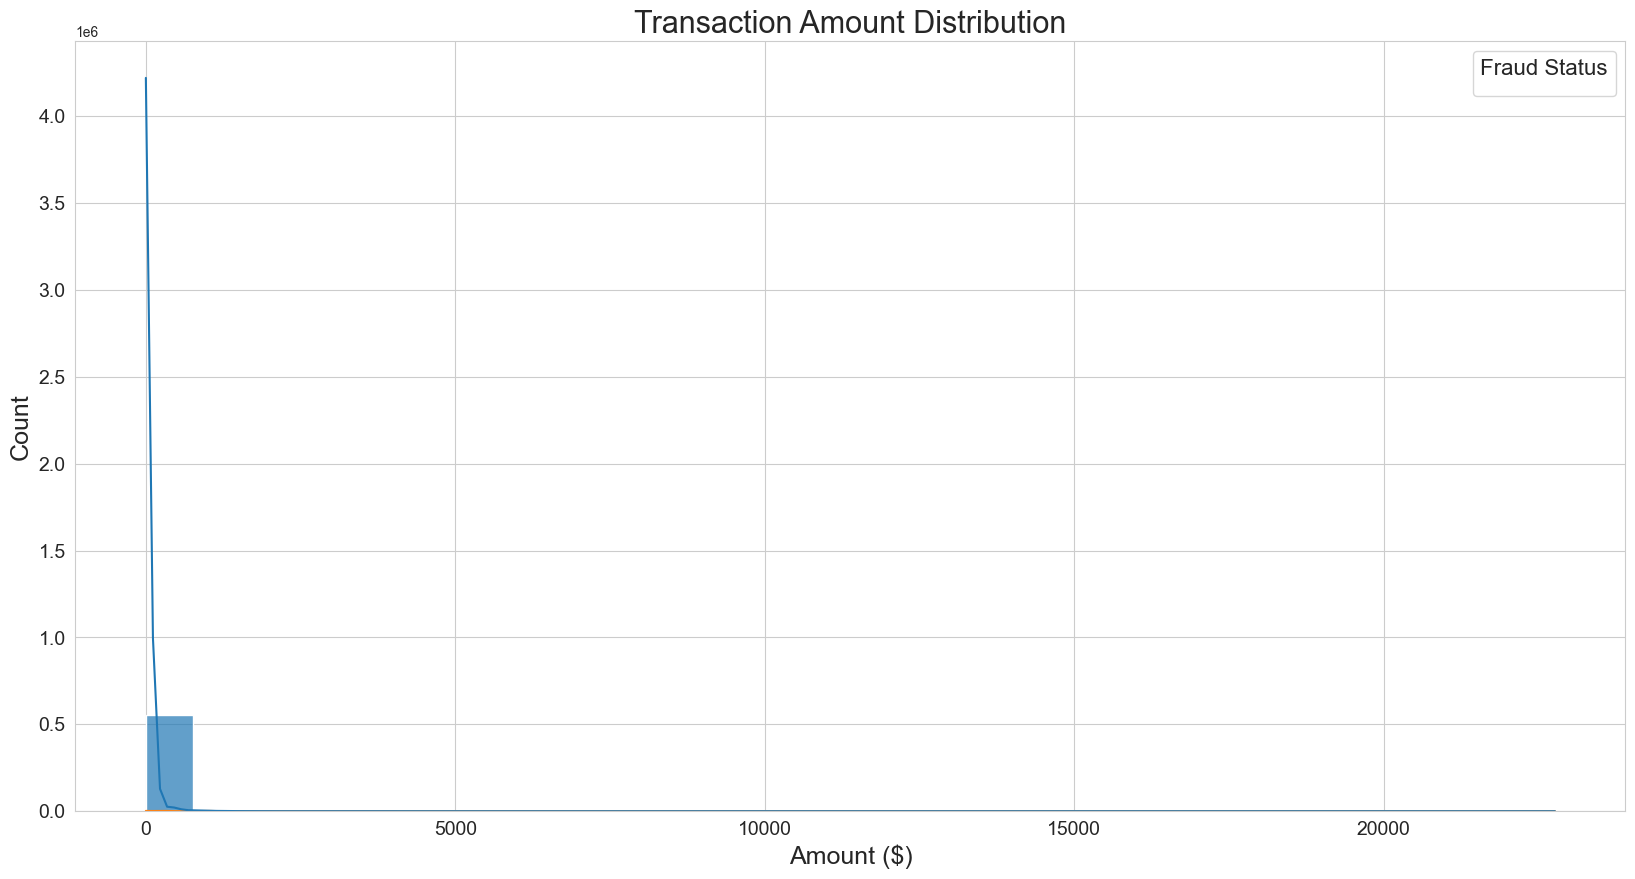

In [17]:
# Calculate the Euclidean distance between the user's location and the merchant location (lat, long)
df_test['distance'] = df_test.apply(lambda row: euc(
    row['merch_lat'], 
    row['lat'], 
    row['merch_long'], 
    row['long']
), axis=1)

plt.figure(figsize=(20, 10))  # Increased size for better visibility

sns.histplot(
    data=df_test, 
    x='amt', 
    kde=True,
    hue='is_fraud',
    multiple="stack",
    bins=30,  # Adjust number of bins if necessary
    alpha=0.7  # Slight transparency for overlapping areas
)

plt.title('Transaction Amount Distribution', fontsize=22)  # Larger title font size
plt.xlabel('Amount ($)', fontsize=18)  # Larger x-axis label
plt.ylabel('Count', fontsize=18)  # Larger y-axis label
plt.xticks(fontsize=14)  # Larger x-axis ticks
plt.yticks(fontsize=14)  # Larger y-axis ticks
plt.legend(title='Fraud Status', fontsize=14, title_fontsize=16, loc='upper right')  # Legend font sizes

plt.show()

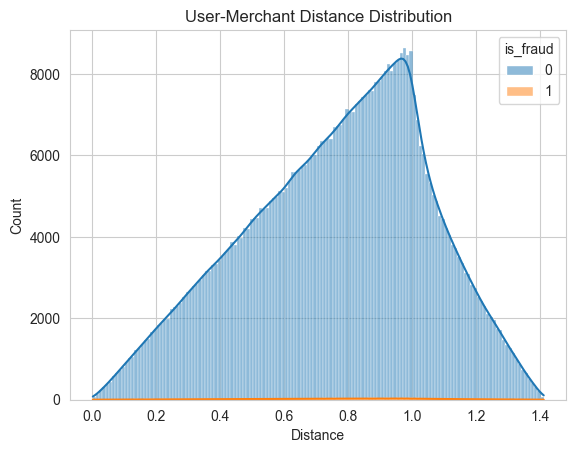

In [18]:
sns.histplot(
    data=df_test, 
    x='distance', 
    kde=True,
    hue='is_fraud',
    multiple="stack"
)
plt.title('User-Merchant Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

In [19]:
print("\nSummary Statistics:")


Summary Statistics:


In [20]:
print("\nTransaction Amounts:")  
df_test.groupby('is_fraud')['amt'].describe()


Transaction Amounts:


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,553574.0,67.614408,152.471931,1.00,9.60,47.15,82.62,22768.11
1,2145.0,528.356494,392.747594,1.78,214.51,371.94,907.77,1320.92


In [21]:
print("\nUser-Merchant Distances:")
df_test.groupby('is_fraud')['distance'].describe()


User-Merchant Distances:


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,553574.0,0.765505,0.284721,0.001429,0.564415,0.798194,0.976981,1.412221
1,2145.0,0.767905,0.287140,0.041810,0.562698,0.797913,0.979968,1.401864


In [22]:
df_test.columns.tolist()

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'age',
 'name',
 'trans_timestamp',
 'distance']

In [23]:
# First, calculate age and add it to df_train (similar to what you did for df_test)
df_train.drop(['Unnamed: 0'], axis=1, inplace=True)
df_train.drop_duplicates(inplace=True)
df_train.dropna(inplace=True)
df_train['age'] = df_train['dob'].apply(calculate_age)
df_train.drop(['dob'], axis=1, inplace=True)
df_train['name'] = df_train['first'] + ' ' + df_train['last']
df_train.drop(['first', 'last'], axis=1, inplace=True)

# Calculate distance for df_train
df_train['distance'] = df_train.apply(lambda row: euc(
    row['merch_lat'], 
    row['lat'], 
    row['merch_long'], 
    row['long']
), axis=1)

# Convert timestamp for df_train
df_train['trans_timestamp'] = pd.to_datetime(df_train['trans_date_trans_time']).astype(np.int64) // 10**9

# Drop irrelevant columns
columns_to_drop: List[str] = [
    'trans_date_trans_time',  # Already converted to trans_timestamp
    'cc_num',                 # Sensitive information
    'merchant',              # Categorical, high cardinality
    'street',               # Too specific location data
    'city',                 # Already have city_pop
    'state',                # Already have geographic info
    'zip',                  # Already have geographic info
    'lat',                  # Already calculated distance
    'long',                 # Already calculated distance
    'merch_lat',            # Already calculated distance
    'merch_long',           # Already calculated distance
    'trans_num',            # Transaction identifier
    'unix_time',            # Already have trans_timestamp
    'name',                 # Personal identifier
]

# Keep important features
columns_to_keep: List[str] = [
    'category',             # Transaction category
    'amt',                  # Transaction amount
    'gender',              # Demographic info
    'city_pop',            # Population density
    'job',                 # Demographic info
    'is_fraud',            # Target variable
    'age',                 # Demographic info
    'trans_timestamp',     # Timing information
    'distance'             # Distance between user and merchant
]
# Drop columns
df_test = df_test.drop(columns=columns_to_drop)

In [24]:
df_test.columns.tolist()

['category',
 'amt',
 'gender',
 'city_pop',
 'job',
 'is_fraud',
 'age',
 'trans_timestamp',
 'distance']

In [25]:
df_train.columns.tolist()

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'age',
 'name',
 'distance',
 'trans_timestamp']

In [26]:
print("Columns to drop from df_train:")
columns_to_drop_train = [col for col in df_train.columns if col not in df_test.columns]
print(columns_to_drop_train)

fraud_train_df = df_train.drop(columns=columns_to_drop_train)
fraud_test_df = df_test.copy()

print("\nFinal columns in fraud_train_df:", fraud_train_df.columns.tolist())
print("\nFinal columns in fraud_test_df:", fraud_test_df.columns.tolist())

Columns to drop from df_train:
['trans_date_trans_time', 'cc_num', 'merchant', 'street', 'city', 'state', 'zip', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'name']

Final columns in fraud_train_df: ['category', 'amt', 'gender', 'city_pop', 'job', 'is_fraud', 'age', 'distance', 'trans_timestamp']

Final columns in fraud_test_df: ['category', 'amt', 'gender', 'city_pop', 'job', 'is_fraud', 'age', 'trans_timestamp', 'distance']


In [27]:
# Define the desired column order
column_order = sorted([
    'category',
    'amt',
    'gender',
    'city_pop',
    'job',
    'is_fraud',
    'age',
    'trans_timestamp',
    'distance'
])

# Reorder columns in both dataframes
fraud_train_df = fraud_train_df[column_order]
fraud_test_df = fraud_test_df[column_order]

# Verify the results
print("\nFinal columns in fraud_train_df:", fraud_train_df.columns.tolist())
print("\nFinal columns in fraud_test_df:", fraud_test_df.columns.tolist())


Final columns in fraud_train_df: ['age', 'amt', 'category', 'city_pop', 'distance', 'gender', 'is_fraud', 'job', 'trans_timestamp']

Final columns in fraud_test_df: ['age', 'amt', 'category', 'city_pop', 'distance', 'gender', 'is_fraud', 'job', 'trans_timestamp']


In [28]:
categorical_columns = fraud_train_df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_columns:
  combined_values = pd.concat([fraud_train_df[col], fraud_test_df[col]])
  
  codes, uniques = pd.factorize(combined_values)
  
  fraud_train_df[col] = pd.Categorical(fraud_train_df[col], categories=uniques).codes
  fraud_test_df[col] = pd.Categorical(fraud_test_df[col], categories=uniques).codes

In [29]:
fraud_train_df.head()

,age,amt,category,city_pop,distance,gender,is_fraud,job,trans_timestamp
0,36,4.97,0,3495,0.872830,0,0,0,1546300818
1,46,107.23,1,149,0.272310,0,0,1,1546300844
2,62,220.11,2,4154,0.975845,1,0,2,1546300851
3,57,45.00,3,1939,0.919802,1,0,3,1546300876
4,38,41.96,4,99,0.868505,1,0,4,1546300986


In [30]:
fraud_test_df.head()

,age,amt,category,city_pop,distance,gender,is_fraud,job,trans_timestamp
0,56,2.86,9,333497,0.266004,1,0,130,1592741665
1,34,29.84,9,302,0.991674,0,0,222,1592741673
2,54,41.28,10,34496,0.682970,0,0,36,1592741693
3,37,60.05,4,54767,0.250985,1,0,388,1592741715
4,69,3.19,11,1126,1.118816,1,0,320,1592741717


In [31]:
X_train = fraud_train_df.drop('is_fraud', axis=1)
y_train = fraud_train_df['is_fraud']

X_test = fraud_test_df.drop('is_fraud', axis=1)
y_test = fraud_test_df['is_fraud']

In [32]:
X_train.head()

,age,amt,category,city_pop,distance,gender,job,trans_timestamp
0,36,4.97,0,3495,0.872830,0,0,1546300818
1,46,107.23,1,149,0.272310,0,1,1546300844
2,62,220.11,2,4154,0.975845,1,2,1546300851
3,57,45.00,3,1939,0.919802,1,3,1546300876
4,38,41.96,4,99,0.868505,1,4,1546300986


In [33]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [34]:
X_test.head()

,age,amt,category,city_pop,distance,gender,job,trans_timestamp
0,56,2.86,9,333497,0.266004,1,130,1592741665
1,34,29.84,9,302,0.991674,0,222,1592741673
2,54,41.28,10,34496,0.682970,0,36,1592741693
3,37,60.05,4,54767,0.250985,1,388,1592741715
4,69,3.19,11,1126,1.118816,1,320,1592741717


In [35]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN, SMOTETomek

# Basic SMOTE with optimized parameters
smote = SMOTE(
    sampling_strategy='auto',     # Automatically determine ratio to make classes balanced
    random_state=42,
    k_neighbors=5,               # Number of nearest neighbors to use
    n_jobs=-1,                   # Use all available processors
)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_resampled, y_train_resampled)

# Get feature names (assuming X_train_resampled is a DataFrame)
feature_names = X_train_resampled.columns if hasattr(X_train_resampled, 'columns') else [f'Feature {i}' for i in range(X_train_resampled.shape[1])]

# Calculate feature importances
importances = model.feature_importances_

In [40]:
importances

array([0.03216756, 0.68927979, 0.20574846, 0.02354218, 0.00589525,
       0.00886869, 0.01861334, 0.01588474])

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [42]:
lr_model = LogisticRegression(random_state=42)

In [43]:
lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [44]:
lr_predictions = lr_model.predict(X_test_scaled)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy

0.9639889944378364

In [46]:
from dataclasses import dataclass
from pathlib import Path
from typing import Dict, List, Optional, Any
import logging
import time
from datetime import datetime
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, average_precision_score,
    confusion_matrix, roc_curve, precision_recall_curve
)

@dataclass
class ModelEvaluationResults:
    """Container for model evaluation metrics and metadata."""
    model_name: str
    metrics: Dict[str, float]
    predictions: np.ndarray
    probabilities: Optional[np.ndarray] = None
    training_time: float = 0.0

class ModelEvaluator:
    """Simple model evaluation class for machine learning models."""
    
    def __init__(
        self,
        output_dir: str = "./out/bonus",
        logger: Optional[logging.Logger] = None
    ):
        self.output_dir = Path(output_dir)
        self.logger = logger or self._setup_logger()
        self._setup_directories()
        
    def _setup_logger(self) -> logging.Logger:
        """Configure logging with appropriate formatting."""
        logger = logging.getLogger("ModelEvaluator")
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                '%(asctime)s - %(levelname)s - %(message)s',
                datefmt='%Y-%m-%d %H:%M:%S'
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)
            logger.setLevel(logging.INFO)
        return logger
    
    def _setup_directories(self):
        """Create necessary output directories."""
        self.plots_dir = self.output_dir / "plots"
        self.models_dir = self.output_dir / "models"
        for directory in [self.plots_dir, self.models_dir]:
            directory.mkdir(parents=True, exist_ok=True)
    
    def evaluate_models(
        self,
        models: List[Any],
        X_train: pd.DataFrame,
        X_test: pd.DataFrame,
        y_train: pd.Series,
        y_test: pd.Series,
        experiment_name: str
    ) -> Dict[str, ModelEvaluationResults]:
        """
        Evaluate multiple models sequentially and return their results.
        """
        results = {}
        
        for model in models:
            model_name = model.__class__.__name__
            self.logger.info(f"Evaluating {model_name}")
            
            try:
                # Train model
                start_time = time.time()
                with warnings.catch_warnings():
                    warnings.filterwarnings('ignore')
                    model.fit(X_train, y_train)
                training_time = time.time() - start_time
                
                # Make predictions
                predictions = model.predict(X_test)
                
                # Get probability predictions if available
                try:
                    probabilities = model.predict_proba(X_test)[:, 1]
                except (AttributeError, NotImplementedError):
                    probabilities = None
                
                # Calculate metrics
                metrics = {
                    'accuracy': float(accuracy_score(y_test, predictions)),
                    'f1': float(f1_score(y_test, predictions)),
                    'training_time': float(training_time)
                }
                
                if probabilities is not None:
                    metrics.update({
                        'roc_auc': float(roc_auc_score(y_test, probabilities)),
                        'average_precision': float(average_precision_score(y_test, probabilities))
                    })
                
                # Create result object
                result = ModelEvaluationResults(
                    model_name=model_name,
                    metrics=metrics,
                    predictions=predictions,
                    probabilities=probabilities,
                    training_time=training_time
                )
                
                results[model_name] = result
                
                # Create visualizations
                self._create_visualizations(result, y_test, experiment_name)
                
                # Save model
                self._save_model(model, model_name, experiment_name)
                
                # Log results
                self._log_model_results(result)
                
            except Exception as e:
                self.logger.error(f"Error evaluating {model_name}: {str(e)}")
        
        self._log_comparative_results(results)
        return results
    
    def _create_visualizations(
        self,
        result: ModelEvaluationResults,
        y_test: pd.Series,
        experiment_name: str
    ):
        """Generate and save visualization plots."""
        fig = plt.figure(figsize=(20, 10))

        # Confusion Matrix
        plt.subplot(2, 2, 1)
        cm = confusion_matrix(y_test, result.predictions)
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive']
        )
        plt.title(f'Confusion Matrix - {result.model_name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        
        if result.probabilities is not None:
            # ROC Curve
            plt.subplot(2, 2, 2)
            fpr, tpr, _ = roc_curve(y_test, result.probabilities)
            plt.plot(fpr, tpr, label=f'ROC curve (AUC = {result.metrics["roc_auc"]:.3f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend(loc="lower right")
            
            # Precision-Recall Curve
            plt.subplot(2, 2, 3)
            precision, recall, _ = precision_recall_curve(y_test, result.probabilities)
            plt.plot(recall, precision, 
                    label=f'PR curve (AP = {result.metrics["average_precision"]:.3f})')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve')
            plt.legend(loc="lower left")
            
            # Prediction Distribution
            plt.subplot(2, 2, 4)
            sns.kdeplot(data=pd.DataFrame({
                'Probability': result.probabilities,
                'Class': y_test
            }), x='Probability', hue='Class')
            plt.title('Prediction Probability Distribution')
        
        plt.tight_layout()
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        plot_path = self.plots_dir / f"{experiment_name}_{result.model_name}_{timestamp}.png"
        plt.savefig(plot_path)
        plt.close()
    
    def _save_model(self, model: Any, model_name: str, experiment_name: str):
        """Save trained model to disk."""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        model_path = self.models_dir / f"{experiment_name}_{model_name}_{timestamp}.pkl"
        with open(model_path, "wb") as f:
            pickle.dump(model, f)
    
    def _log_model_results(self, result: ModelEvaluationResults):
        """Log individual model results."""
        self.logger.info(f"\n{'-'*50}")
        self.logger.info(f"Evaluation Results for {result.model_name}")
        self.logger.info(f"{'-'*50}")
        for metric, value in result.metrics.items():
            self.logger.info(f"{metric}: {value:.4f}")
    
    def _log_comparative_results(self, results: Dict[str, ModelEvaluationResults]):
        """Log comparative results across all models."""
        self.logger.info("\nComparative Model Performance:")
        self.logger.info(f"{'-'*50}")
        
        metrics_df = pd.DataFrame({
            model_name: result.metrics
            for model_name, result in results.items()
        }).T
        
        self.logger.info("\n" + str(metrics_df))

In [47]:
evaluator = ModelEvaluator()

xgboost_model = xgb.XGBClassifier(
    n_estimators=1000,          # More trees often yield better performance
    learning_rate=0.01,         # Smaller learning rate for better generalization
    max_depth=6,                # Control tree depth to prevent overfitting
    min_child_weight=1,         # Minimum sum of instance weight needed in a child
    gamma=0.1,                  # Minimum loss reduction for partition
    subsample=0.8,              # Fraction of samples used for training trees
    colsample_bytree=0.8,       # Fraction of features used for training trees
    random_state=42
)

# Decision Tree with optimized parameters
decision_tree_model = DecisionTreeClassifier(
    max_depth=8,                # Control tree depth
    min_samples_split=10,       # Minimum samples required to split
    min_samples_leaf=4,         # Minimum samples required at leaf node
    max_features='sqrt',        # Number of features to consider
    class_weight='balanced',    # Handle class imbalance
    random_state=42
)

# Random Forest with optimized parameters
random_forest_model = RandomForestClassifier(
    n_estimators=500,           # Number of trees
    max_depth=15,               # Maximum depth of trees
    min_samples_split=5,        # Minimum samples required to split
    min_samples_leaf=2,         # Minimum samples required at leaf node
    max_features='sqrt',        # Number of features to consider at each split
    bootstrap=True,             # Use bootstrap samples
    class_weight='balanced',    # Handle class imbalance
    random_state=42
)

# KNN with optimized parameters
knn_model = KNeighborsClassifier(
    n_neighbors=5,              # Number of neighbors
    weights='distance',         # Weight points by distance
    algorithm='auto',           # Automatically choose best algorithm
    leaf_size=30,               # Leaf size for tree algorithms
    p=2,                        # Power parameter for Minkowski metric (2 = Euclidean)
    metric='minkowski'          # Distance metric to use
)

# SVC with optimized parameters
svc_model = SVC(
    C=10.0,                     # Regularization parameter
    kernel='rbf',               # Radial basis function kernel
    gamma='scale',              # Kernel coefficient
    probability=True,           # Enable probability estimates
    class_weight='balanced',    # Handle class imbalance
    random_state=42
)

# Naive Bayes with optimized parameters
naive_bayes_model = GaussianNB(
    var_smoothing=1e-9          # Stability adjustment
)

models = [
    xgboost_model, 
    random_forest_model, 
    decision_tree_model, 
    svc_model, 
    naive_bayes_model, 
    knn_model
]

# Run parallel evaluation
results = evaluator.evaluate_models(
    models=models,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    experiment_name="classifier_comparison"
)

2024-11-02 15:40:28 - INFO - Evaluating XGBClassifier
2024-11-02 15:41:14 - INFO - 
--------------------------------------------------
2024-11-02 15:41:14 - INFO - Evaluation Results for XGBClassifier
2024-11-02 15:41:14 - INFO - --------------------------------------------------
2024-11-02 15:41:14 - INFO - accuracy: 0.9971
2024-11-02 15:41:14 - INFO - f1: 0.5940
2024-11-02 15:41:14 - INFO - training_time: 41.1145
2024-11-02 15:41:14 - INFO - roc_auc: 0.9926
2024-11-02 15:41:14 - INFO - average_precision: 0.6757
2024-11-02 15:41:14 - INFO - Evaluating RandomForestClassifier
2024-11-02 15:55:03 - INFO - 
--------------------------------------------------
2024-11-02 15:55:03 - INFO - Evaluation Results for RandomForestClassifier
2024-11-02 15:55:03 - INFO - --------------------------------------------------
2024-11-02 15:55:03 - INFO - accuracy: 0.9954
2024-11-02 15:55:03 - INFO - f1: 0.4664
2024-11-02 15:55:03 - INFO - training_time: 805.9490
2024-11-02 15:55:03 - INFO - roc_auc: 0.989

In [ ]:
from sklearn.inspection import permutation_importance

def analyze_feature_importance(
    model,
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    y_test: pd.Series,
    n_top_features: int = 20
) -> dict:
    """
    Comprehensive feature importance analysis with multiple metrics and visualizations.
    
    Args:
        model: Trained model with feature_importances_ attribute
        X_train: Training data
        X_test: Test data
        y_test: Test labels
        n_top_features: Number of top features to display
    """
    # Get feature importances from model
    feature_importances = model.feature_importances_
    feature_names = X_train.columns
    
    # Create base DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values('Importance', ascending=False)
    
    # Calculate cumulative importance
    feature_importance_df['Cumulative_Importance'] = np.cumsum(
        feature_importance_df['Importance']
    )
    
    # Calculate permutation importance
    perm_importance = permutation_importance(
        model, X_test, y_test,
        n_repeats=10,
        random_state=42
    )
    
    # Add permutation importance to DataFrame
    feature_importance_df['Permutation_Importance'] = pd.Series(
        perm_importance.importances_mean,
        index=feature_importance_df.index
    )
    
    # Calculate feature importance statistics
    importance_stats = {
        'n_important_features': sum(feature_importance_df['Importance'] > 0.01),
        'top_features_90_percent': sum(feature_importance_df['Cumulative_Importance'] <= 0.9),
        'correlation_matrix': calculate_feature_correlations(X_train, feature_importance_df)
    }
    
    # Create visualizations
    plt.figure(figsize=(20, 15))
    
    # 1. Bar plot of top feature importances
    plt.subplot(2, 2, 1)
    plot_top_features(feature_importance_df, n_top_features, 'Feature Importance (MDI)')
    
    # 2. Bar plot of permutation importances
    plt.subplot(2, 2, 2)
    plot_permutation_importance(feature_importance_df, n_top_features)
    
    # 3. Cumulative importance plot
    plt.subplot(2, 2, 3)
    plot_cumulative_importance(feature_importance_df)
    
    # 4. Feature correlation heatmap
    plt.subplot(2, 2, 4)
    plot_feature_correlations(importance_stats['correlation_matrix'], n_top_features)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print_feature_importance_analysis(feature_importance_df, importance_stats)
    
    return feature_importance_df, importance_stats

def calculate_feature_correlations(X_train: pd.DataFrame, importance_df: pd.DataFrame) -> pd.DataFrame:
    """Calculate correlations between top important features."""
    top_features = importance_df['Feature'].head(10).tolist()
    return X_train[top_features].corr()

def plot_top_features(df: pd.DataFrame, n_features: int, title: str):
    """Plot top n important features."""
    sns.barplot(
        data=df.head(n_features),
        x='Importance',
        y='Feature',
        palette='viridis'
    )
    plt.title(title)
    plt.xlabel('Importance Score')
    plt.ylabel('Features')

def plot_permutation_importance(df: pd.DataFrame, n_features: int):
    """Plot permutation importance for top features."""
    sns.barplot(
        data=df.head(n_features),
        x='Permutation_Importance',
        y='Feature',
        palette='viridis'
    )
    plt.title('Permutation Importance')
    plt.xlabel('Permutation Importance Score')
    plt.ylabel('Features')

def plot_cumulative_importance(df: pd.DataFrame):
    """Plot cumulative importance curve."""
    plt.plot(range(len(df)), df['Cumulative_Importance'], 'b-')
    plt.hlines(y=0.9, xmin=0, xmax=len(df), color='r', linestyles='--')
    plt.title('Cumulative Feature Importance')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')

def plot_feature_correlations(corr_matrix: pd.DataFrame, n_features: int):
    """Plot correlation heatmap for top features."""
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt='.2f'
    )
    plt.title('Feature Correlations')

def print_feature_importance_analysis(df: pd.DataFrame, stats: dict):
    """Print detailed analysis of feature importance."""
    print("\nFeature Importance Analysis")
    print("-" * 50)
    
    print(f"\nTop 10 Most Important Features:")
    print(df[['Feature', 'Importance', 'Permutation_Importance']].head(10))
    
    print(f"\nFeature Importance Statistics:")
    print(f"- Number of important features (>1% importance): {stats['n_important_features']}")
    print(f"- Features needed for 90% cumulative importance: {stats['top_features_90_percent']}")
    
    print("\nFeature Categories Distribution:")
    categorical_features = df[df['Feature'].str.contains('cat_', case=False)]
    numerical_features = df[~df['Feature'].str.contains('cat_', case=False)]
    
    print(f"- Categorical features in top 10: {sum(categorical_features['Feature'].head(10).count())}")
    print(f"- Numerical features in top 10: {sum(numerical_features['Feature'].head(10).count())}")

feature_importance_df, importance_stats = analyze_feature_importance(
    xgboost_model,
    X_train,
    X_test_scaled,
    y_test
)

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
X_train.head()

In [ ]:
X_train['age_group'] = pd.cut(fraud_train_df['age'], bins=[0, 18, 25, 35, 45, 55, 65, 100], labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+'])

In [ ]:
X_train.head()

In [ ]:
X_train['hour'] = pd.to_datetime(fraud_train_df['trans_timestamp'], unit='s').dt.hour
X_train['day_of_week'] = pd.to_datetime(fraud_train_df['trans_timestamp'], unit='s').dt.dayofweek
X_train['is_weekend'] = X_train['day_of_week'].isin([5, 6]).astype(int)
X_train['is_night'] = X_train['hour'].between(22, 6).astype(int)

In [ ]:
X_train.head()

In [ ]:
X_train['amount_bin'] = pd.qcut(fraud_train_df['amt'], q=5, labels=['very_low', 'low', 'medium', 'high', 'very_high'])
X_train['is_large_transaction'] = (fraud_train_df['amt'] > fraud_train_df['amt'].quantile(0.95)).astype(int)

In [ ]:
X_train.head()

In [ ]:
X_train['population_density_category'] = pd.qcut(
    X_train['city_pop'], 
    q=5, 
    labels=['rural', 'suburban', 'urban', 'metropolitan', 'dense_metropolitan']
)
X_train['is_remote_transaction'] = (X_train['distance'] > X_train['distance'].quantile(0.75)).astype(int)

In [ ]:
X_train.head()

In [ ]:
features = pd.get_dummies(X_train, drop_first=True)
features.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y_train, test_size=0.2, random_state=42)

In [ ]:
xgb_model_improved = xgb.XGBClassifier(random_state=42)
evaluator.evaluate_model(models=[xgb_model_improved], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, experiment_name="xgb_model_improved")

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

xgb_model_improved = xgb.XGBClassifier(random_state=42)
evaluator.evaluate_model(models=[xgb_model_improved], X_train=X_train_resampled, X_test=X_test, y_train=y_train_resampled, y_test=y_test, experiment_name="xgb_model_smote")

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

xgb_params = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 7),
    'gamma': uniform(0, 0.5)
}

In [ ]:
xgb_base = xgb.XGBClassifier(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_params,
    n_iter=25,  # Number of parameter settings sampled
    cv=3,       # Number of folds
    verbose=2,
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    scoring='f1'  # Optimize for F1 score
)

# Fit the model with SMOTE-resampled data
xgb_random.fit(X_train_resampled, y_train_resampled)

# Get best model and parameters
best_xgb = xgb_random.best_estimator_
print("Best parameters:", xgb_random.best_params_)

# Evaluate the optimized model
evaluator.evaluate_model(models=[best_xgb], X_train=X_train_resampled, X_test=X_test, y_train=y_train_resampled, y_test=y_test, experiment_name="xgb_optimized")


In [ ]:
voting_model = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('rf', RandomForestClassifier(
        n_estimators=500,
        max_depth=8,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )),
    ('dt', DecisionTreeClassifier(
        max_depth=6,
        min_samples_split=10,
        min_samples_leaf=4,
        class_weight='balanced',
        random_state=42
    ))
], voting='soft', weights=[2, 1, 1])

evaluator.evaluate_model(models=[voting_model], X_train=X_train_resampled, X_test=X_test, y_train=y_train_resampled, y_test=y_test, experiment_name="voting_model")